> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head(5)

KeyError: "['PatientId' 'AppointmentID'] not found in axis"

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [10]:
df['Timespan']=df['ScheduledDay']-df['AppointmentDay']
df['Timespan'].describe()

count                       110527
mean     -11 days +19:35:28.171397
std        15 days 06:07:11.673762
min            -179 days +00:00:00
25%             -15 days +00:00:00
50%              -4 days +00:00:00
75%                0 days 00:00:00
max                6 days 00:00:00
Name: Timespan, dtype: object

In [11]:
df['Timespan'] = pd.to_numeric(df['Timespan'])

In [12]:
df = df[df['Timespan'] >= 0 ]
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Timespan
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
19,F,2016-04-29,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No,0
24,F,2016-04-29,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No,0
26,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No,0
28,M,2016-04-29,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Data Visulaization)

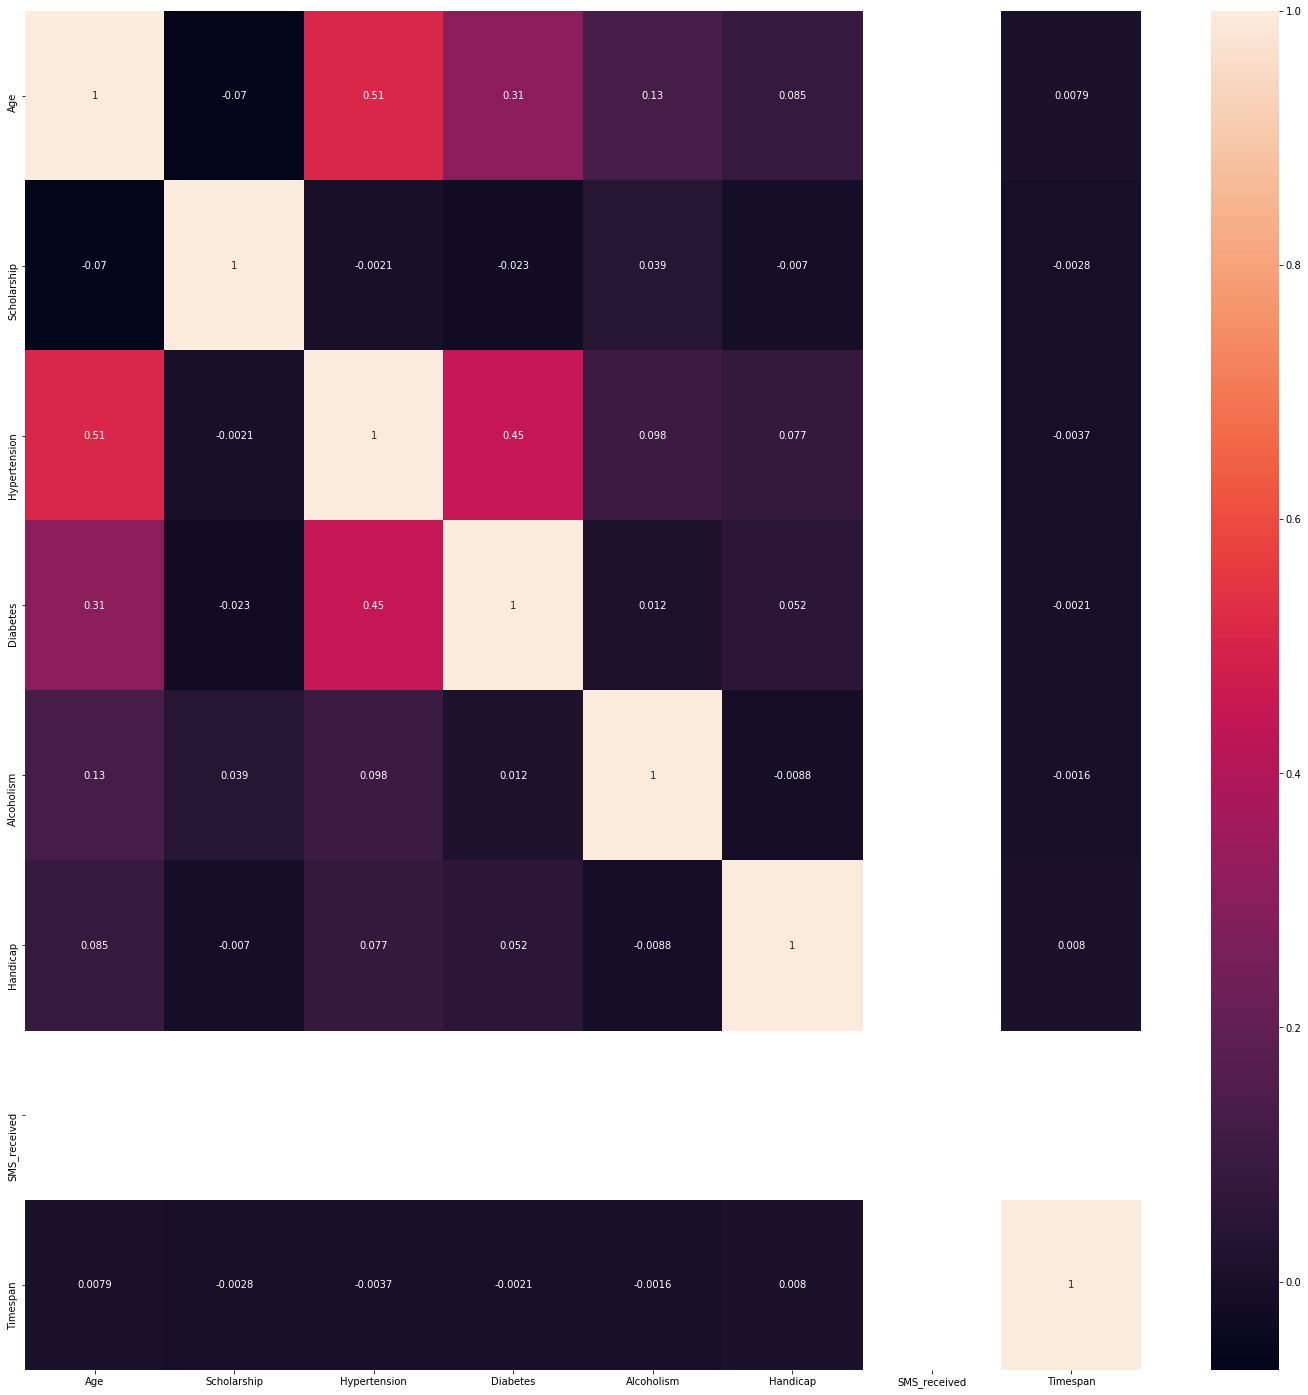

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True);

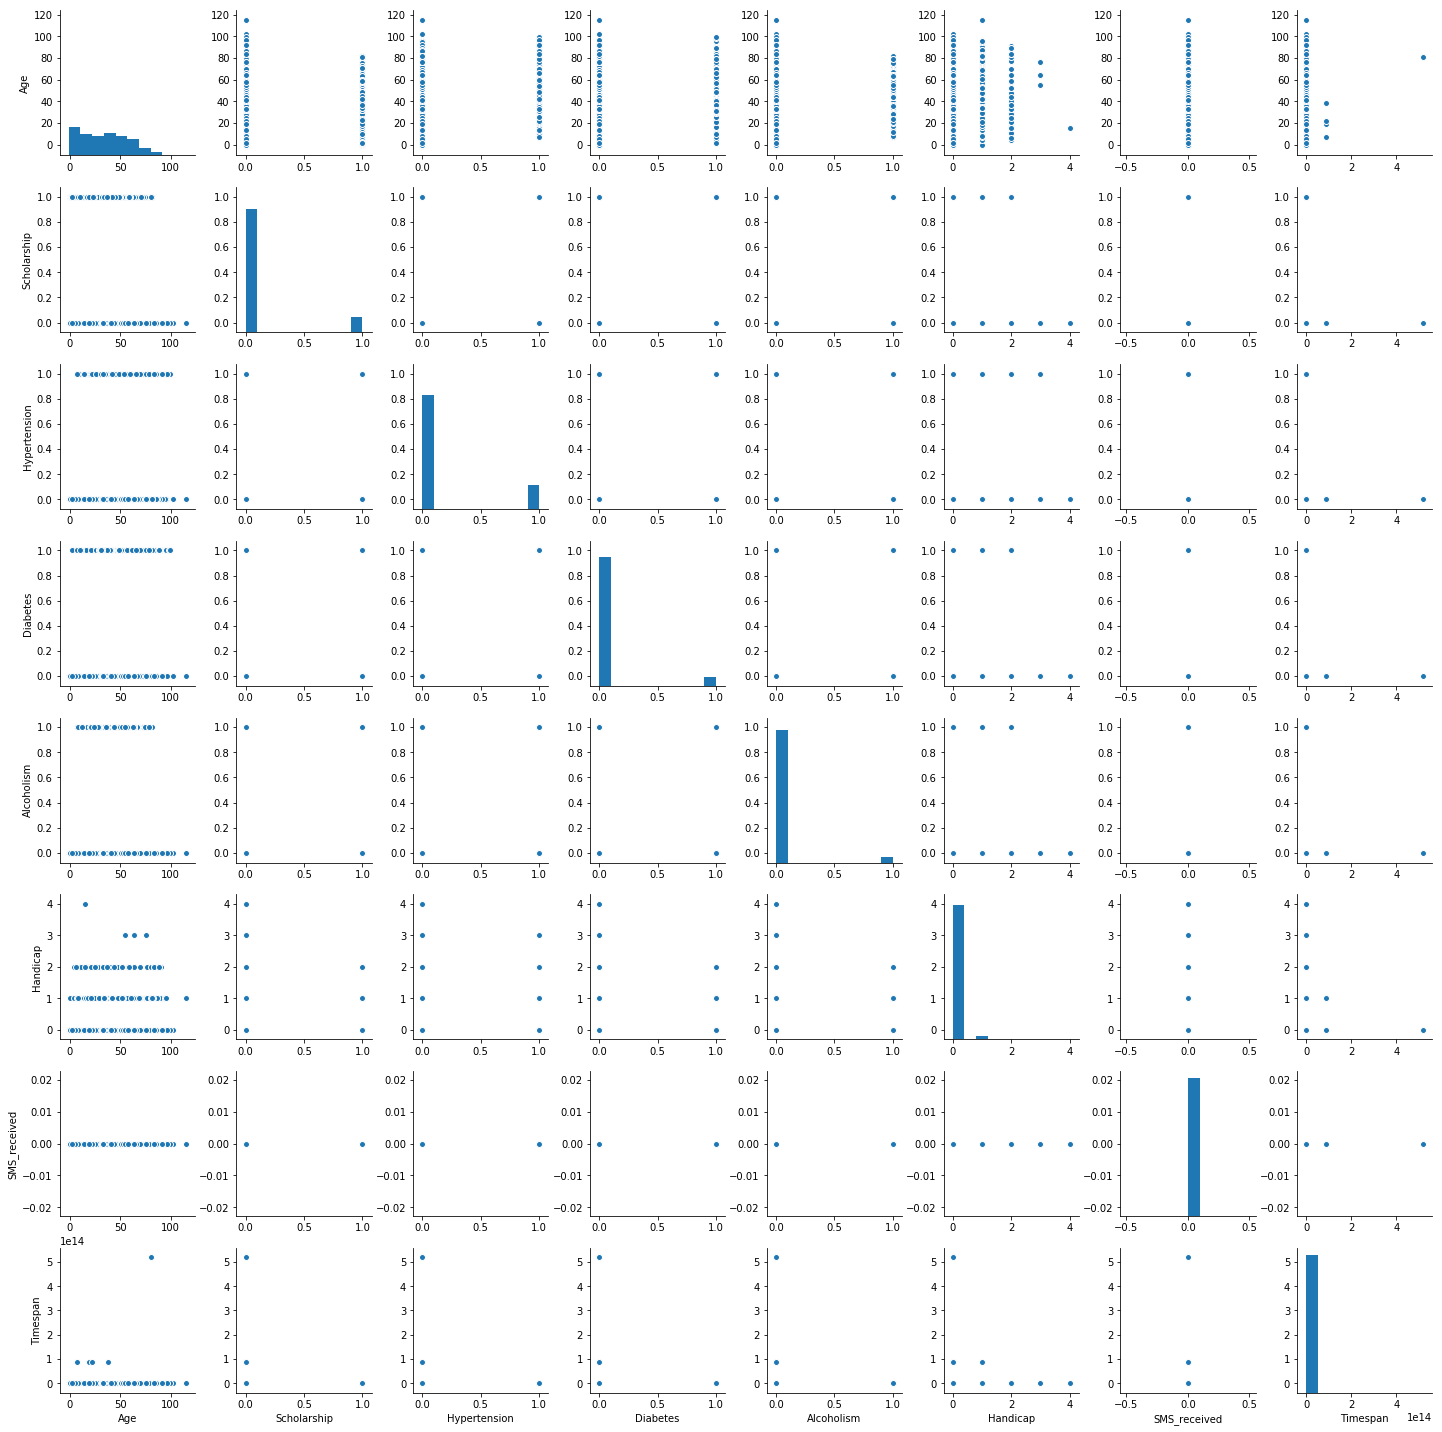

In [15]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5024067940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f501d88a438>]], dtype=object)

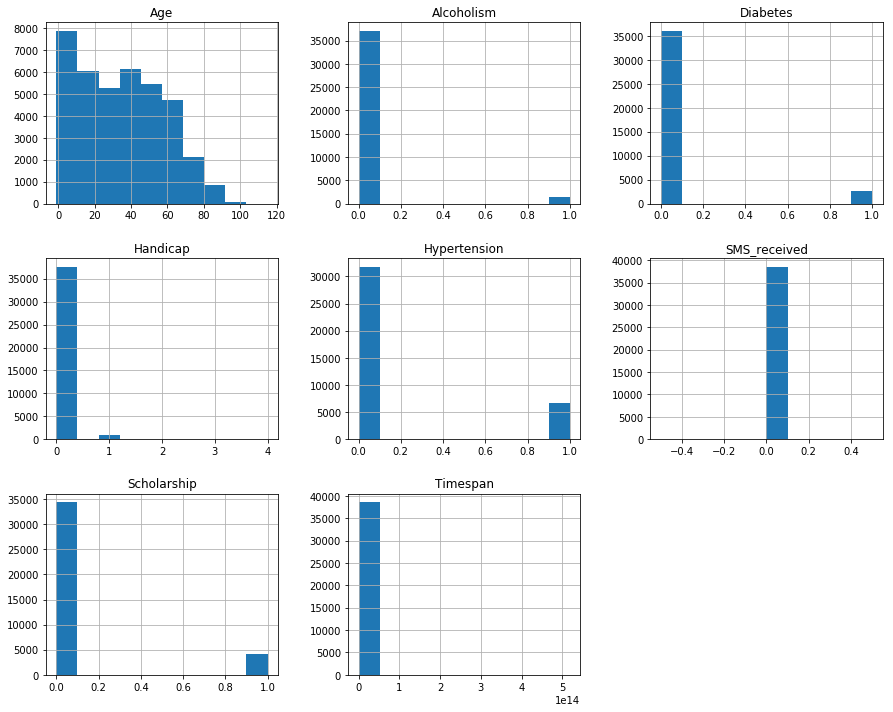

In [16]:
df.hist(figsize=(15,12))

# how many no and yes in df

In [ ]:
#value counts for NO-SHOW 
df['No-show'].value_counts()

In [ ]:
sns.countplot(df["No-show"])
plt.xlabel("showed or missed",fontsize=15);
plt.ylabel("number of people",fontsize=15);

## how many femal and male

In [ ]:
df['Gender'].value_counts()

In [ ]:
sns.countplot(df['Gender'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between patients  and Gender who showed");

## what about the Scholarships!

In [ ]:
sns.countplot(df['Scholarship'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("the relations with Scholarship of people who showed");

In [ ]:
sns.countplot(df['Scholarship'])

# what about the Hypertension?

In [ ]:
sns.countplot(df['Hypertension'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Hipertension of people who showed");

In [ ]:
sns.countplot(df['Hypertension'])

# what about the Diabetes

In [ ]:
sns.countplot(df['Diabetes'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Diabetes")
plt.title("the relations with Diabetes of people who showed");

In [ ]:
sns.countplot(df['Diabetes'])

# what about the Alcoholism?

In [ ]:
sns.countplot(df['Alcoholism'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Alcoholism of people who showed");

In [ ]:
sns.countplot(df['Alcoholism'])

# what about the Handicap?

In [ ]:
sns.countplot(df['Handicap'],hue=df["No-show"])
plt.xlabel("Showed")
plt.ylabel("Handcap")
plt.title("Handcap affect")
plt.legend();

In [ ]:
sns.countplot(df['Handicap'])

# what about the SMS_received

In [ ]:
ax = sns.countplot(x=df.SMS_received, hue=df["No-show"], data=df)
ax.set_title("Show/NoShow for SMS_received")
x_ticks_labels=['No SMS_received', 'SMS_received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [ ]:
sns.countplot(df['SMS_received'])

### Research Question 2  (neighborhood)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(18,4))
plt.title('Patients distribution by neighbourhood')
sns.countplot(x=df.Neighbourhood, data=df, hue_order=df["No-show"]);
plt.xticks(rotation='90')
plt.show()

In [ ]:
df.Age.mean()

In [ ]:
df.Age.hist()

<a id='conclusions'></a>
## Conclusions

there are a strong relationship between sms_reminder and people that showed so it suppose to send sms-message regulary the number of people that showed  88208 or 77.2% and not showen  22319 or 22.8% men are more persistent to going to the appoinment age is the heighst important factor.

age from 0 to 10 show more than any groub            ,,,,
people have [Scholarship	Hypertension	Diabetes	Alcoholism	Handicap] not show more than have not       
people not received him sms message show more than received  

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])